In [9]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import numpy as np
import matplotlib.pyplot as pl


In [5]:
(train_images,train_labels),(test_images,test_labels) = mnist.load_data ()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
print('Training data:',train_images.shape,train_labels.shape)
print('Testing data:',test_images.shape,test_labels.shape)

Training data: (60000, 28, 28) (60000,)
Testing data: (10000, 28, 28) (10000,)


In [7]:
print(train_labels[0:20])

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


In [8]:
#unique numbers from the train labels
total_classes = np.unique(train_labels)
number_of_total_classes = len(total_classes)
print("Total number of output classes:",number_of_total_classes)
print("All output classes:",total_classes)


Total number of output classes: 10
All output classes: [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'label:7')

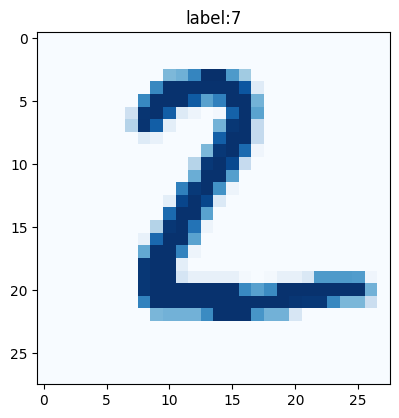

In [17]:
#displaying the first image in testing data
plt.figure(figsize=[10,5])
plt.subplot(122)
plt.imshow(test_images[1,:,:],cmap='Blues') # Changed 'camp' to 'cmap'
plt.title("label:{}".format(test_labels[0]))

In [16]:
#change from matrix to array of dimension 28x28 to array of dimension 784
newdimensionData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0],newdimensionData)
test_data = test_images.reshape(test_images.shape[0],newdimensionData)
print(train_data.shape)
print(test_data.shape)

(60000, 784)
(10000, 784)


**Data Preprocessing**

In [18]:
#change to float datatype
train_data = train_data.astype("float32")
test_data = test_data.astype('float32')

In [20]:
#scale the data to lie between 0 to 1
train_data /= 255
test_data /= 255

In [21]:
#change the labels from integer to categorical data
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [22]:
#display the change for category label using one hot coding
print('origianl label 6:',train_labels[10])
print("After conversion to catgeorical (one-hot):" ,train_labels_one_hot[10])

origianl label 6: 3
After conversion to catgeorical (one-hot): [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


**Model Training**

In [23]:
#Model Training
model = Sequential()
model.add(Dense(512,activation ='relu',input_shape=(newdimensionData,)))
model.add(Dense(512,activation ='relu'))
model.add(Dense(number_of_total_classes,activation='softmax'))

**Model Configuration**

In [24]:
model.compile(optimizer='SGD',loss='categorical_crossentropy',metrics=['accuracy'])

In [25]:
history = model.fit(train_data,train_labels_one_hot,batch_size=256,epochs=10,verbose=1, validation_data =(test_data,test_labels_one_hot))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.4935 - loss: 1.9224 - val_accuracy: 0.8235 - val_loss: 0.8901
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.8313 - loss: 0.7862 - val_accuracy: 0.8771 - val_loss: 0.5271
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.8712 - loss: 0.5163 - val_accuracy: 0.8918 - val_loss: 0.4197
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.8907 - loss: 0.4191 - val_accuracy: 0.9029 - val_loss: 0.3686
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.8986 - loss: 0.3774 - val_accuracy: 0.9089 - val_loss: 0.3399
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.9060 - loss: 0.3449 - val_accuracy: 0.9137 - val_loss: 0.3173
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9103 - loss: 0.3230 - val_accuracy: 0.9170 - val_loss: 0.3024
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.9138 - loss: 0.3095 - val_accu

**Model Evaluation**

In [27]:
[test_loss,test_acc] = model.evaluate(test_data,test_labels_one_hot)
print("Evaluation result: Loss{}.accuracy ={}".format(test_loss,test_acc))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9161 - loss: 0.3100
Evaluation result: Loss0.26939332485198975.accuracy =0.9258999824523926


In [28]:
y_pred = model.predict(test_data)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [29]:
y_pred_labels =np.argmax(y_pred,axis=1)


In [30]:
y_pred_labels

array([7, 2, 1, ..., 4, 5, 6])

In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, y_pred_labels)
cm

array([[ 961,    0,    2,    1,    0,    5,    7,    1,    3,    0],
       [   0, 1113,    2,    2,    0,    2,    4,    1,   11,    0],
       [  12,    2,  922,   15,   15,    1,   17,   14,   31,    3],
       [   3,    0,   17,  931,    0,   20,    2,   14,   19,    4],
       [   1,    4,    3,    1,  930,    1,   10,    2,    6,   24],
       [  13,    3,    4,   33,    8,  784,   14,    7,   22,    4],
       [  16,    3,    3,    1,   12,   11,  909,    1,    2,    0],
       [   3,   11,   24,    7,    8,    0,    0,  952,    2,   21],
       [   7,    8,    8,   23,    9,   20,   13,   11,  866,    9],
       [  12,    8,    2,   10,   48,   10,    1,   24,    3,  891]])

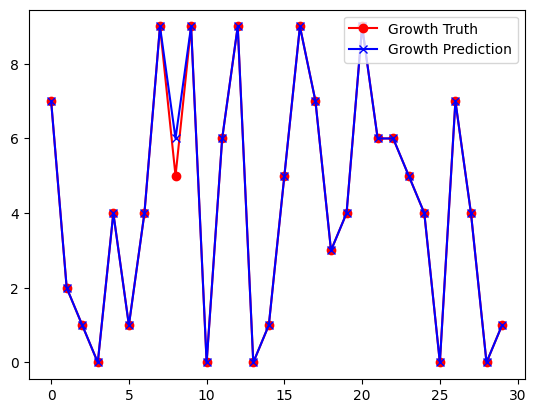

In [41]:
#ploting predicting labels with a blue line
plt.plot(range(len(test_labels))[:30], test_labels[:30], color='r', label='Growth Truth', linestyle='-', marker='o' )
plt.plot(range(len(y_pred_labels))[:30], y_pred_labels[:30], color='b', label='Growth Prediction', linestyle='-', marker='x')
plt.legend()
plt.show()
